In [126]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline

In [77]:
# Load Data
train_data = pd.read_csv('278_labelled_uri_train.csv')

In [78]:
# Visualize Data
# train_data.describe()
# train_data.info()
# print(train_data.keys())


labels = pd.DataFrame(train_data['labels'])
train_data.drop('labels', axis=1, inplace=True)
train_data.drop('uri', axis=1, inplace=True)

# train_data['id'] = range(len(train_data))
# labels['id'] = range(len(labels))

In [79]:
train_data.describe()
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222350 entries, 0 to 222349
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0.2      222350 non-null  int64  
 1   Unnamed: 0.1      222350 non-null  int64  
 2   Unnamed: 0        222350 non-null  int64  
 3   duration (ms)     222350 non-null  float64
 4   danceability      222350 non-null  float64
 5   energy            222350 non-null  float64
 6   loudness          222350 non-null  float64
 7   speechiness       222350 non-null  float64
 8   acousticness      222350 non-null  float64
 9   instrumentalness  222350 non-null  float64
 10  liveness          222350 non-null  float64
 11  valence           222350 non-null  float64
 12  tempo             222350 non-null  float64
 13  spec_rate         222350 non-null  float64
dtypes: float64(11), int64(3)
memory usage: 23.7 MB


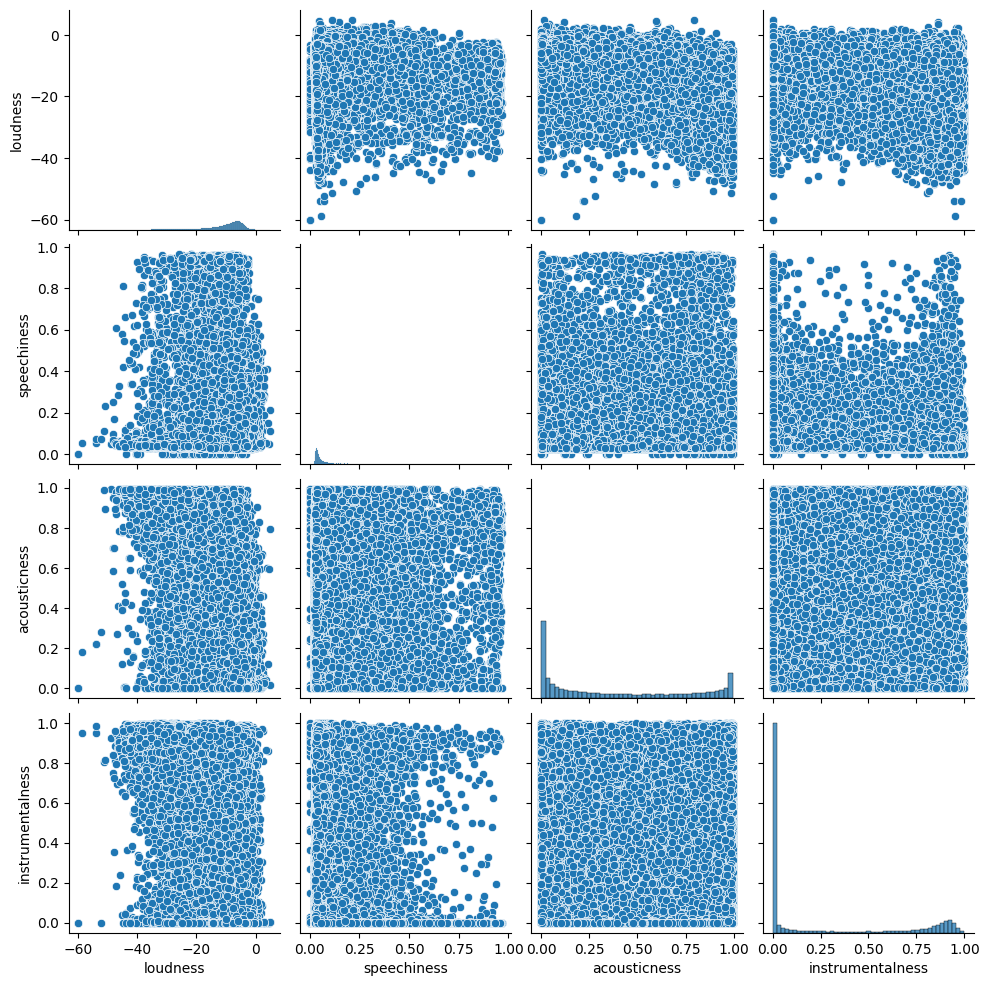

In [80]:
sns.pairplot(train_data[['loudness', 'speechiness', 'acousticness', 'instrumentalness']])

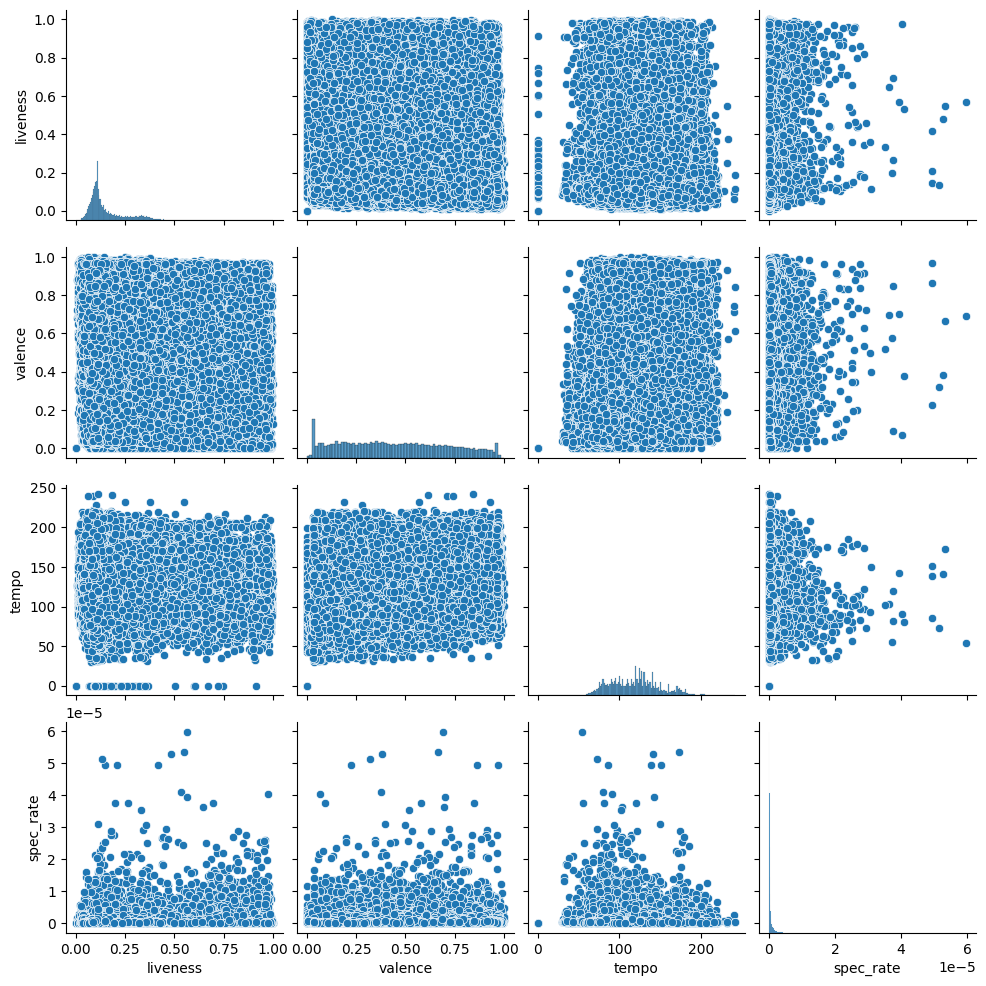

In [81]:
sns.pairplot(train_data[['liveness', 'valence', 'tempo', 'spec_rate']])

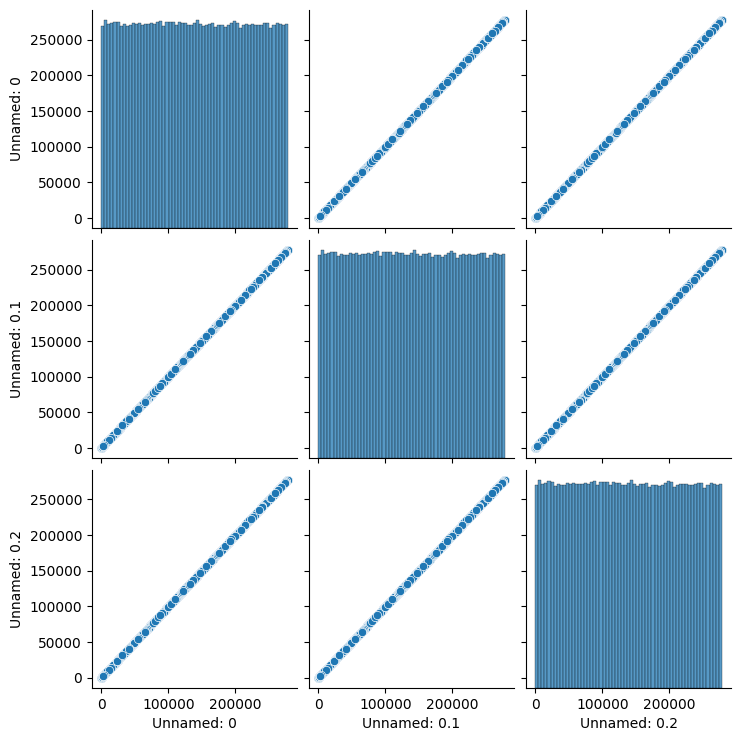

In [82]:
sns.pairplot(train_data[['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.2']])

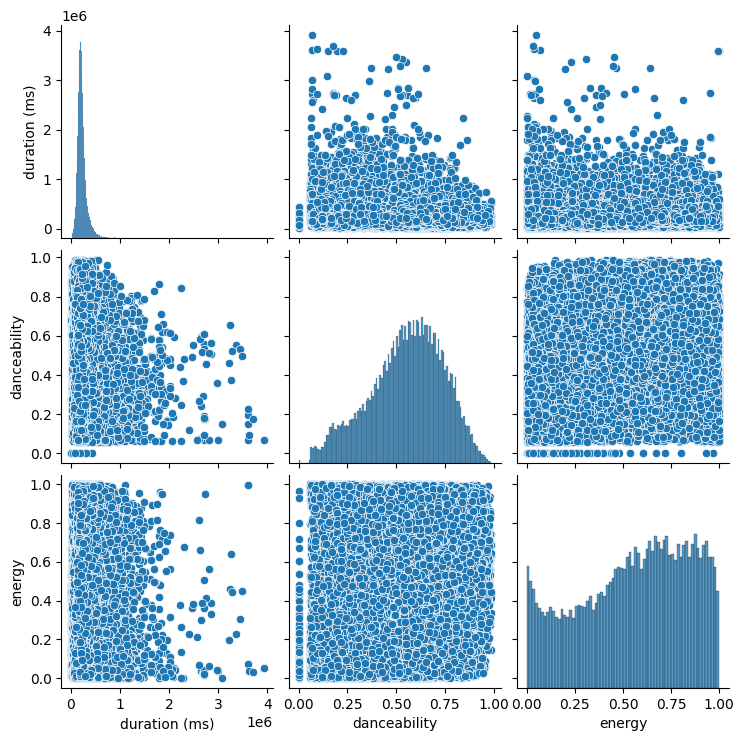

In [83]:
sns.pairplot(train_data[['duration (ms)', 'danceability', 'energy']])

In [ ]:
sns.lineplot(train_data['energy'])

In [84]:
# Remove Unnamed colums
train_data.drop('Unnamed: 0', axis=1, inplace=True)
train_data.drop('Unnamed: 0.1', axis=1, inplace=True)
train_data.drop('Unnamed: 0.2', axis=1, inplace=True)

In [97]:
# Create test-train splitt
X_train, X_test, y_train, y_test = train_test_split(train_data, labels, test_size=0.2, random_state=42)

In [132]:
# Train a XGBoost algorithm

logistic_regression = LogisticRegression(verbose=1)
logistic_regression_params = {'solver': ['lbfgs', 'newton-cg', 'newton-cholesky', 'liblinear', 'sag'],}

cross_validator = KFold(n_splits=5, shuffle=True, random_state=42)

decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree_params = {'criterion': ['gini', 'entropy', 'log_loss'], }

xgb_classifier = XGBClassifier()
xgb_params = {'booster': ['gblinear', 'gbtree', 'dart'], 'max_depth': [2, 6, 12], 'sampling_method': ['uniform', 'gradient_based'], 'tree_method': ["auto", "exact", "approx", "hist"], 'n_estimators': [5, 10, 15]}

# random_forest = RandomForestClassifier()
# random_forest_params = {'n_estimators': [10, 20, 50], 'max_depth': [2, 6, 12]}
# y_train = y_train.iloc[:, 0]


pipeline = Pipeline([
    # ('normalizer', Normalizer()),
    ('stadnardizer', StandardScaler()),
    # ('classifier', GridSearchCV(logistic_regression, logistic_regression_params)),
    # ('classifier', LogisticRegressionCV(cv=cross_validator, verbose=1, max_iter=200))
    # ('classifier', GridSearchCV(estimator=decision_tree, param_grid=decision_tree_params)),
    #('classifier', XGBClassifier(n_estimators=9, max_depth=10, objective='binary:logistic', verbosity=1))
    ('classifier', GridSearchCV(estimator=xgb_classifier, param_grid=xgb_params)),
    # ('classifier', GridSearchCV(estimator=random_forest, param_grid=random_forest_params)),
])

pipeline.fit(X_train, y_train)


/home/martin/Projects/git/CAS_ML4SE/data_hack/.venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [12:08:02] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "max_depth", "sampling_method", "tree_method" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/martin/Projects/git/CAS_ML4SE/data_hack/.venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [12:08:02] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "max_depth", "sampling_method", "tree_method" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/martin/Projects/git/CAS_ML4SE/data_hack/.venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [12:08:03] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "max_depth", "sampling_method", "tree_method" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/martin/Projects/git/CAS_ML4SE/data_hack/.venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [12:0

,steps,"[('stadnardizer', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,estimator,"XGBClassifier...ree=None, ...)"
,param_grid,"{'booster': ['gblinear', 'gbtree', ...], 'max_depth': [2, 6, ...], 'n_estimators': [5, 10, ...], 'sampling_method': ['uniform', 'gradient_based'], ...}"
,scoring,None
,n_jobs,None


Matches: 42131 of 44470
Accuracy: 0.9474027434225321


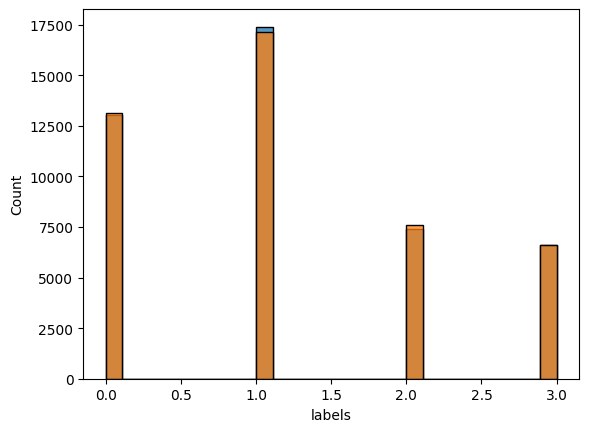

In [133]:
# # Test the performance of the model in the test/train split
y_pred = pipeline.predict(X_test)

y_pred = pd.Series(y_pred, index=y_test.index)
y_pred.name = 'labels'
y_test_s = pd.Series(y_test['labels'], index=y_test.index)

sns.histplot(y_pred)
sns.histplot(y_test_s)

matches = (y_pred == y_test_s)
print(f'Matches: {matches.sum()} of {len(y_pred)}')
print(f'Accuracy: {matches.sum() / len(y_test_s)}')